# Cleaning Outliers #

In order to get a celan data, we need to clean our data from outliers. \
The outliers of the global signal of each group (dyslexia,control) were identified in the notebook 'Scrubbing'. \
The 2 matrices 'control_outliers', 'dyslexia_outliers' contain the position of each outlier.

Next, we are going to clean all signals from outliers. import numpy as np
import pandas as pd 
import sys
import os
from glob import glob
import matplotlib.pyplot as plt


In [1]:
import numpy as np
import pandas as pd 
import sys
import os
from glob import glob
import matplotlib.pyplot as plt
import pickle

## 1. Import all data corrected after GSR ##


In [2]:
data_dirs = os.path.join('GSR', "*")
all_dirs = glob(data_dirs)

n = 115

GSR = np.zeros((264,850,n))
GSR_name = []
i=0

for a_dir in all_dirs:
    temp_data_df = np.loadtxt(a_dir)
    GSR[:,:,i] = temp_data_df
    splitted_file = a_dir.split(os.sep)
    name = splitted_file[1]
    GSR_name.append(name[:-20])
    i += 1
    

In [23]:
print(GSR_name)

['sub38', 'sub178', 'sub129', 'sub21', 'sub83', 'sub160', 'sub131', 'sub82', 'sub71', 'sub179', 'sub23', 'sub81', 'sub189', 'sub132', 'sub190', 'sub98', 'sub80', 'sub73', 'sub22', 'sub75', 'sub24', 'sub86', 'sub164', 'sub87', 'sub74', 'sub25', 'sub196', 'sub134', 'sub165', 'sub166', 'sub137', 'sub195', 'sub26', 'sub77', 'sub4', 'sub167', 'sub85', 'sub173', 'sub199', 'sub91', 'sub200', 'sub33', 'sub123', 'sub32', 'sub201', 'sub198', 'sub93', 'sub182', 'sub171', 'sub120', 'sub28', 'sub79', 'sub169', 'sub30', 'sub61', 'sub92', 'sub29', 'sub170', 'sub183', 'sub94', 'sub67', 'sub185', 'sub176', 'sub37', 'sub95', 'sub177', 'sub184', 'sub187', 'sub125', 'sub174', 'sub96', 'sub65', 'sub34', 'sub124', 'sub175', 'sub186', 'sub64', 'sub35', 'sub54', 'sub115', 'sub144', 'sub56', 'sub116', 'sub57', 'sub146', 'sub108', 'sub51', 'sub48', 'sub140', 'sub50', 'sub18', 'sub113', 'sub112', 'sub143', 'sub157', 'sub107', 'sub16', 'sub44', 'sub15', 'sub104', 'sub45', 'sub105', 'sub154', 'sub43', 'sub12', 'su

In [3]:
control_outliers = pd.read_pickle("control_outliers.pkl")
dyslexia_outliers = pd.read_pickle("dyslexia_outliers.pkl")
outliers = pd.concat([control_outliers,dyslexia_outliers])

Replacing all not-nan values to 1: 

In [4]:
outliers = outliers.where(~outliers.notna(), 1)
outliers

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
filename,,,,,,,,,,,,,,,,,,,,,
sub124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
sub177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
sub184,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
sub83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
i = 1
sub = GSR_name[i]  #the subject's number [string]
sub_outliers = outliers.loc[sub] #the subject's outliers row
sub_out_i = sub_outliers.index[sub_outliers ==1].tolist() #the subject's outliers column indices

GSR_sub = GSR[:,:,i]
GSR_sub = np.delete(GSR_sub,sub_out_i,1)
GSR_sub.shape

(264, 800)

## 2. Cleaning all outliers and creating correlation matrices ##
Now, we have GSR [ROI = 264 , TimeSeries = 850 , patients = 115]. \
We want to cut every outlier column in each patient by the position specified in 'outliers'. \
After cutting all outliers, we will create a correlation matrix [264,264] for every patient. 

In [18]:
correlation_mat = np.zeros((264,264,n))
for i in range (n):
    
    sub = GSR_name[i]  #the subject's number [string]
    sub_outliers = outliers.loc[sub] #the subject's outliers row
    sub_out_i = sub_outliers.index[sub_outliers ==1].tolist() #the subject's outliers column indices

    GSR_sub = GSR[:,:,i]
    GSR_sub = np.delete(GSR_sub,sub_out_i,1) #deleting columns with outliers
    print('The number of timeseries in ' + str(sub) + ' is ' + str(GSR_sub.shape[1]))
    correlation_mat[:,:,i] = np.corrcoef(GSR_sub)
    

The number of timeseries in sub38 is 835
The number of timeseries in sub178 is 800
The number of timeseries in sub129 is 845
The number of timeseries in sub21 is 831
The number of timeseries in sub83 is 836
The number of timeseries in sub160 is 789
The number of timeseries in sub131 is 829
The number of timeseries in sub82 is 821
The number of timeseries in sub71 is 837
The number of timeseries in sub179 is 817
The number of timeseries in sub23 is 844
The number of timeseries in sub81 is 830
The number of timeseries in sub189 is 818
The number of timeseries in sub132 is 821
The number of timeseries in sub190 is 844
The number of timeseries in sub98 is 828
The number of timeseries in sub80 is 849
The number of timeseries in sub73 is 806
The number of timeseries in sub22 is 838
The number of timeseries in sub75 is 836
The number of timeseries in sub24 is 837
The number of timeseries in sub86 is 834
The number of timeseries in sub164 is 819
The number of timeseries in sub87 is 842
The num

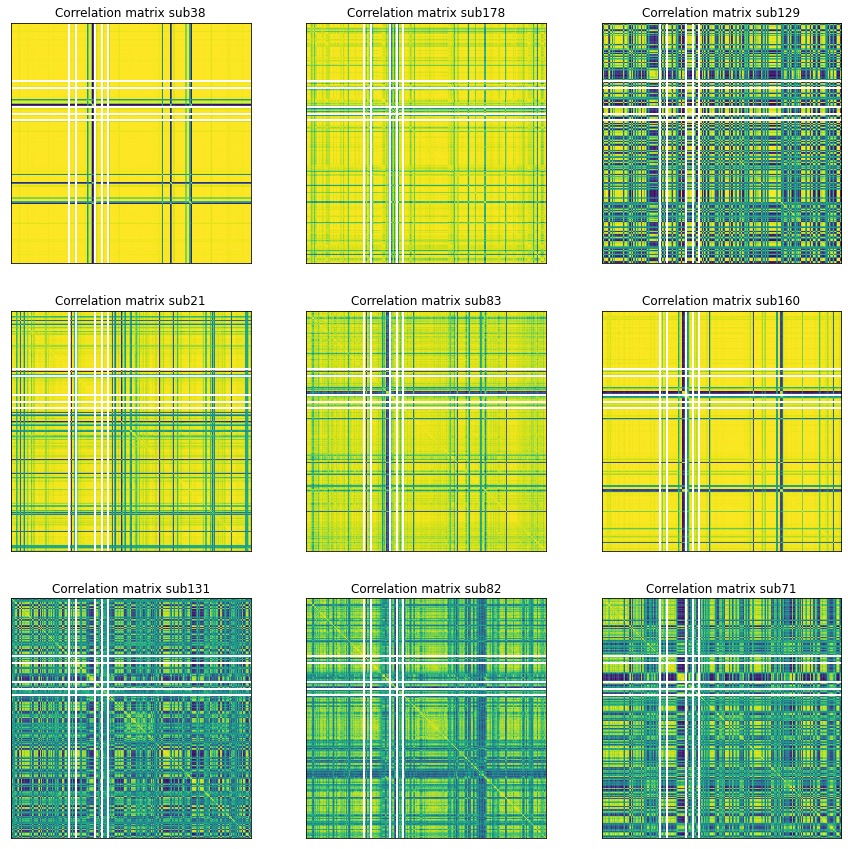

In [27]:
# Correlation matrix of patient 1

plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(correlation_mat[:,:,i])
    plt.title('Correlation matrix ' +str(GSR_name[i]))
    plt.xticks(())
    plt.yticks(())
plt.show()